## Delving into non-parametric methods using pandas and scipy

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

import scipy
from scipy.stats import spearmanr

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 14, 7
sns.set_style("whitegrid")

### The Spearman Rank Correlation

In [3]:
address = '/workspaces/python-for-data-science-and-machine-learning-essential-training-part-1-3006708/data/mtcars.csv'

cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


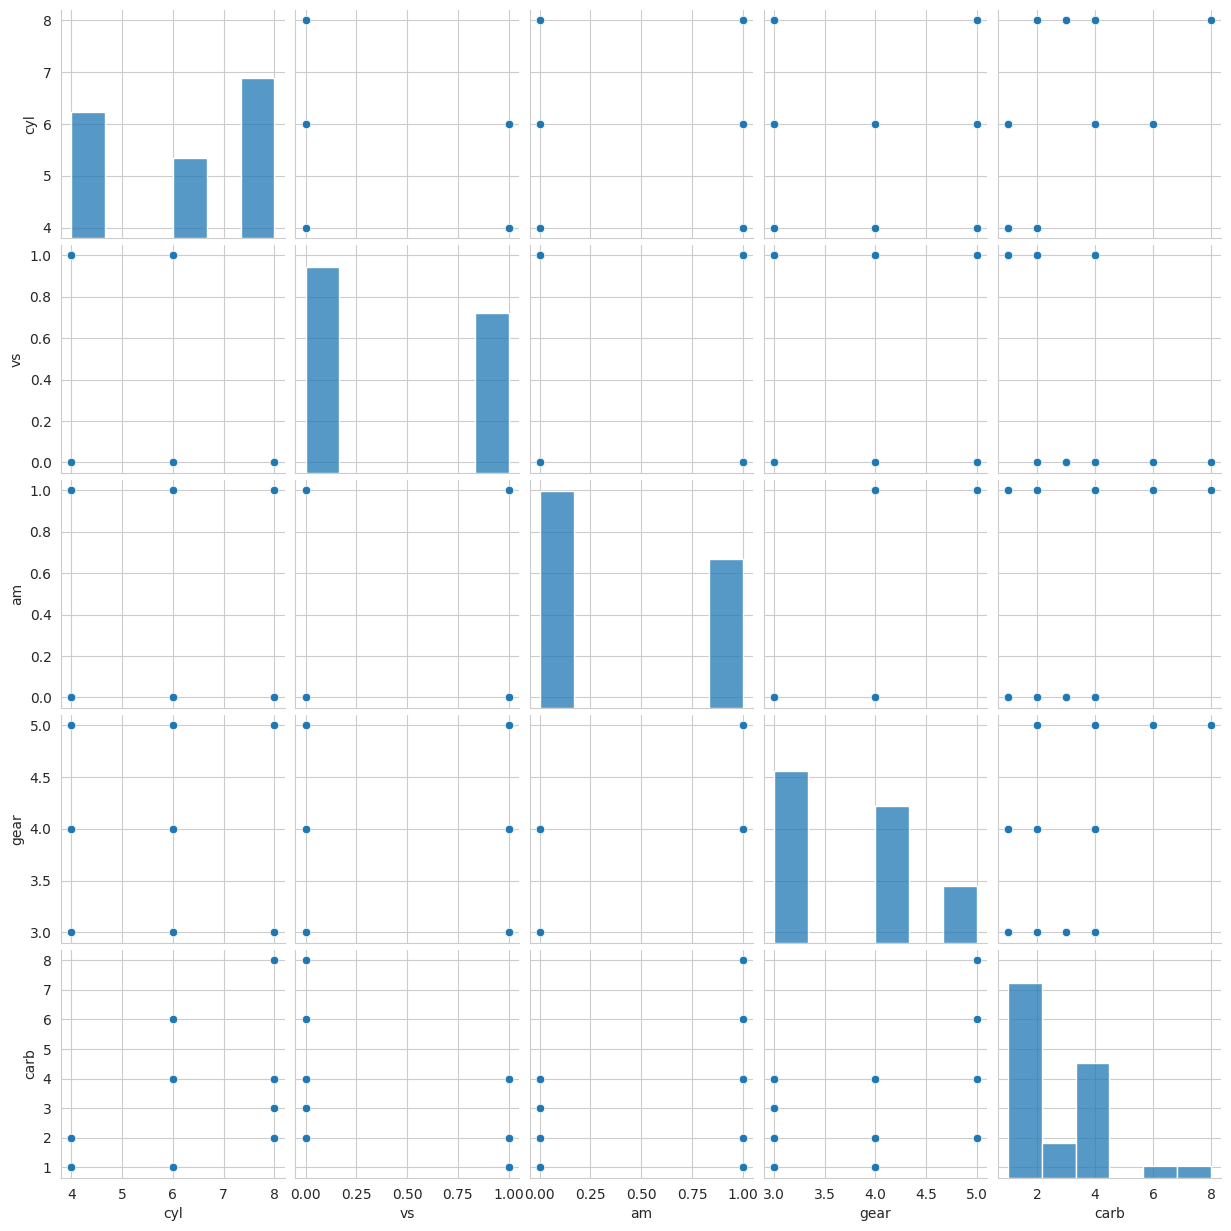

In [6]:
x = cars[['cyl','vs','am','gear','carb']]
sns.pairplot(x)

In [7]:
cyl = cars['cyl']
vs = cars['vs']
am = cars['am']
gear = cars['gear']
spearmen_coef, p_value = spearmanr(cyl, vs)
print('Spearmen Rank Correlation Coeficient %0.3f'% (spearmen_coef))

Spearmen Rank Correlation Coeficient -0.814


In [22]:
spearmen_coef, p_value = spearmanr(gear, am)
print('Spearmen Rank Correlation Coeficient %0.3f'% (spearmen_coef))

Spearmen Rank Correlation Coeficient 0.808


In [17]:
spearmen_coef, p_value = spearmanr(cyl, gear)
print('Spearmen Rank Correlation Coeficient %0.3f'% (spearmen_coef))

Spearmen Rank Correlation Coeficient -0.564


In [20]:
corr = x.corr()

<Axes: >

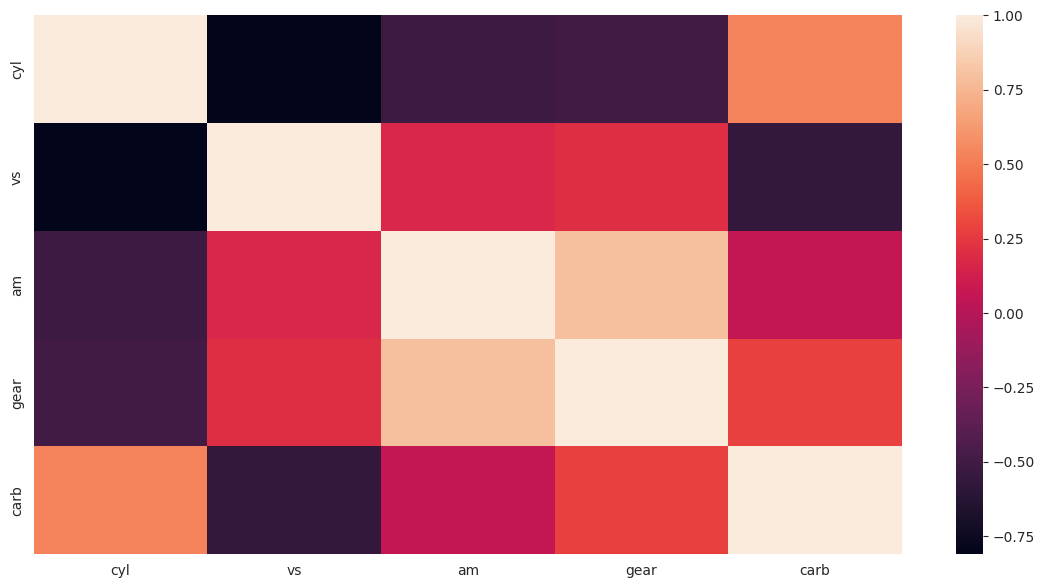

In [21]:
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

### Chi-square test for independence

In [23]:
table = pd.crosstab(cyl,am)
table

am,0,1
cyl,,
4,3,8
6,4,3
8,12,2


In [12]:
from scipy.stats import chi2_contingency

In [13]:
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-Square Statistic Percentage %0.3f, p_value %0.3f'% (chi2,p ))

Chi-Square Statistic Percentage 8.741, p_value 0.013


In [24]:
# Output hasil
print(f"Chi2: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

Chi2: 8.740732951259268
P-value: 0.012646605046107276
Degrees of Freedom: 2
Expected Frequencies: 
[[6.53125 4.46875]
 [4.15625 2.84375]
 [8.3125  5.6875 ]]


In [25]:
table

am,0,1
cyl,,
4,3,8
6,4,3
8,12,2
